In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
tf.__version__

'2.2.0'

In [11]:
from tensorflow.keras.datasets import fashion_mnist

In [17]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [19]:
len(X_test)

10000

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
(60000, 28,28,1) # channel last
(60000,1,28,28) # channel first

(60000, 1, 28, 28)

In [23]:
X_train[0].shape

(28, 28)

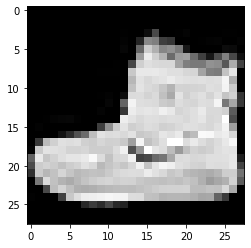

In [26]:
plt.imshow(X_train[0], cmap='gray')

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [41]:
test1 = Sequential([Flatten()])

In [35]:
layer1 = Dense(128, activation='relu')
output = Dense(10, activation='softmax')

In [38]:
model = Sequential([layer1, output])

In [42]:
fl = Flatten(input_shape=(28,28))

In [43]:
model_test = Sequential([fl])

In [44]:
model_test.predict(X_train).shape

(60000, 784)

In [49]:
model = Sequential([
    Flatten(input_shape=(28,28), name = 'f'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
], name = 'tangled')

In [50]:
model.summary()

Model: "tangled"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
f (Flatten)                  (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(X_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 1s 778us/step - loss: 3.0372 - accuracy: 0.6961
Epoch 2/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.6399 - accuracy: 0.7734
Epoch 3/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.5651 - accuracy: 0.7994
Epoch 4/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.5242 - accuracy: 0.8158
Epoch 5/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.4900 - accuracy: 0.8287


In [56]:
a, b = model.evaluate(X_test, y_test, verbose =2)

313/313 - 0s - loss: 0.5413 - accuracy: 0.8142


In [62]:
predictions = model.predict(X_test)

In [63]:
predictions[0]

array([3.59659719e-16, 7.01110505e-16, 1.10741974e-23, 4.97921380e-22,
       6.17402658e-24, 1.01431925e-02, 1.40068251e-18, 1.28155462e-02,
       3.92244614e-12, 9.77041304e-01], dtype=float32)